In [2]:
import os
import numpy as np
import pickle as pkl
from os.path import join as pjoin
from matplotlib import pyplot as plt
from cxy_visual_dev.lib.predefine import proj_dir

anal_dir = pjoin(proj_dir, 'analysis')
work_dir = pjoin(anal_dir, 'plot/outlier')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# 用直方图的形式查看outlier

In [5]:
def plot_histgram(meas_name):
    """
    """
    # inputs
    ages = np.arange(6, 23)
    n_age = len(ages)
    fpath = pjoin(anal_dir, 'RSM/RSM_HCPD-{0}_MMP-vis3-R_age-{1}.pkl')

    iqr_coefs = (1.5, 2, 3)
    iqr_colors = ('r', 'g', 'b')

    # plot
    fig, axes = plt.subplots(1, n_age, figsize=(12, 5))
    for age_idx, age in enumerate(ages):
        ax = axes[age_idx]
        data = pkl.load(open(fpath.format(meas_name, age), 'rb'))
        n_item = len(data['row_name'])
        arr = data['r'].copy()
        arr[np.eye(n_item, dtype=bool)] = np.nan
        corrs = np.nanmean(arr, 1)
        ax.hist(corrs, bins=10, orientation='horizontal')
        xmin, xmax = ax.get_xlim()

        Q1 = np.percentile(corrs, 25)
        Q3 = np.percentile(corrs, 75)
        IQR = Q3 - Q1
        for i, iqr_coef in enumerate(iqr_coefs):
            step = iqr_coef * IQR
            whiskers = [Q1-step, Q3+step]
            ax.hlines(whiskers, xmin, xmax, colors=iqr_colors[i])

        if age_idx == 0:
            ax.set_ylabel(meas_name)
        ax.set_title(f"age-{age}")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    fig.tight_layout()
    fig.show()

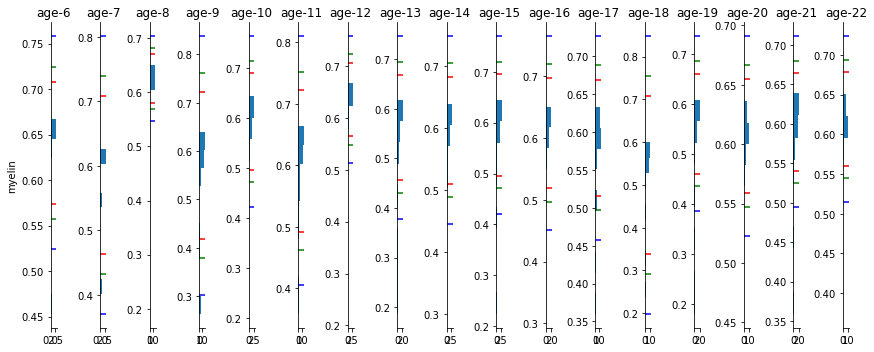

In [6]:
plot_histgram(meas_name='myelin')

# 用箱型图查看outlier

In [12]:
def plot_box_violin(meas_name):
    """
    """
    # inputs
    ages = np.arange(6, 23)
    fpath = pjoin(anal_dir, 'RSM/RSM_HCPD-{0}_MMP-vis3-R_age-{1}.pkl')
    out_file = pjoin(work_dir, f'box_violin_{meas_name}.jpg')

    # plot
    points_list = []
    for age in ages:
        data = pkl.load(open(fpath.format(meas_name, age), 'rb'))
        n_item = len(data['row_name'])
        arr = data['r'].copy()
        arr[np.eye(n_item, dtype=bool)] = np.nan
        corrs = np.nanmean(arr, 1)
        points_list.append(corrs)
    plt.boxplot(points_list, positions=ages)
    # plt.violinplot(points_list, positions=ages, showextrema=False)
    plt.ylabel(meas_name)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file)

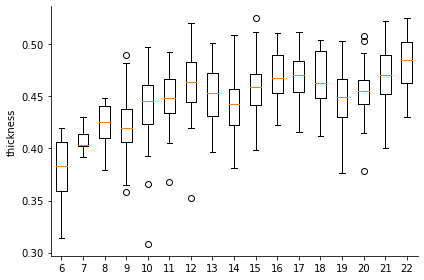

In [14]:
plot_box_violin(meas_name='thickness')